In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("olist_customers_dataset.csv")
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
unique_customers = df1[['customer_unique_id','customer_city','customer_state']]
unique_customers.drop_duplicates(keep='first').reset_index(drop='index')

,customer_unique_id,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP
...,...,...,...
96214,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
96215,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
96216,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
96217,73c2643a0a458b49f58cea58833b192e,canoas,RS


In [4]:
state_unique_customer=df1.groupby('customer_state')['customer_unique_id'].count().reset_index().sort_values(by='customer_unique_id',ascending=False).reset_index(drop=True)
state_unique_customer.columns = ['customer_state','total_customers']
state_unique_customer

,customer_state,total_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [5]:
customer=df1[['customer_id','customer_city','customer_state']]


In [6]:
df1.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
df1['customer_state'].isnull().sum()

0

In [9]:
# how many customers state wise 
state_customer=df1.groupby('customer_state')['customer_id'].count().reset_index().sort_values(by='customer_id',ascending=False).reset_index(drop=True)
state_customer.columns = ['customer_state','total_customers']
state_customer

,customer_state,total_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [10]:
# how many city in each state  in dataset
state_city = df1.groupby("customer_state")["customer_city"].nunique().reset_index()
state_city

,customer_state,customer_city
0,AC,8
1,AL,68
2,AM,5
3,AP,6
4,BA,353
5,CE,161
6,DF,6
7,ES,95
8,GO,178
9,MA,122


In [11]:
# # how many customers city wise 
df1.groupby('customer_city')['customer_id'].count().reset_index().sort_values(by='customer_id',ascending=False).reset_index(drop=True)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


In [12]:
df2=pd.read_csv("olist_geolocation_dataset.csv")
df2

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [13]:
df2.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [14]:
# sns.scatterplot(data=state_city,x='customer_state',y='customer_city')

In [15]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Load your data into a pandas DataFrame
# df = pd.read_csv("olist_geolocation_dataset.csv")

# # Create a GeoDataFrame from the DataFrame
# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['geolocation_lng'], df['geolocation_lat']))

# # Plot the points on a map
# gdf.plot(color='red', markersize=5)

# plt.title("Scatter Plot of Locations")
# plt.show()

In [9]:
df3=pd.read_csv("olist_order_items_dataset.csv")
df3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
df4=pd.read_csv("olist_order_payments_dataset.csv")
df4

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [18]:
df4['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [19]:
df4['total_payment']=df4['payment_installments']*df4['payment_value']


In [20]:
order_payment=df4[['order_id','payment_type','total_payment']]

order_totalpayment = order_payment.groupby(['order_id'])['total_payment'].sum().reset_index()
order_totalpayment

,order_id,total_payment
0,00010242fe8c5a6d1ba2dd792cb16214,144.38
1,00018f77f2f0320c557190d7a144bdd3,779.49
2,000229ec398224ef6ca0657da4fc703e,1084.35
3,00024acbcdf0a6daa1e931b038114c75,51.56
4,00042b26cf59d7ce69dfabb4e55b4fd9,654.12
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,350.55
99438,fffe18544ffabc95dfada21779c9644f,194.13


In [21]:
df5=pd.read_csv("olist_order_reviews_dataset.csv")
df5

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [22]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
df5['review_comment_title'].value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [69]:
df6=pd.read_csv("olist_orders_dataset.csv")
df6

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [71]:
customer_orders=pd.merge(customer,df6,on='customer_id',how='left')
customer_orders

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


## customer order payment

In [75]:
customer_order_payment = pd.merge(customer_orders,order_totalpayment,on='order_id',how='left')
customer_order_payment['order_purchase_timestamp']=pd.to_datetime(customer_order_payment['order_purchase_timestamp'])
customer_order_payment['order_approved_at']=pd.to_datetime(customer_order_payment['order_approved_at'])
customer_order_payment['order_delivered_carrier_date']=pd.to_datetime(customer_order_payment['order_delivered_carrier_date'])
customer_order_payment['order_delivered_customer_date']=pd.to_datetime(customer_order_payment['order_delivered_customer_date'])
customer_order_payment['order_estimated_delivery_date']=pd.to_datetime(customer_order_payment['order_estimated_delivery_date'])
customer_order_payment

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,293.74
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2683.84
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1104.11
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018.00
...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,532.68
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,387.18
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,280.20
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1422.14


In [78]:
# total sales by state
total_sales_by_state = customer_order_payment[customer_order_payment['order_status']=='delivered'].groupby('customer_state')['total_payment'].sum().reset_index().sort_values(by='total_payment',ascending=False).reset_index(drop=True).rename(columns={'total_payment':'total_sales'})
total_sales_by_state

,customer_state,total_sales
0,SP,22011179.29
1,RJ,8576410.19
2,MG,7562728.17
3,RS,3609543.36
4,PR,3188470.72
5,BA,2784437.91
6,SC,2487432.27
7,PE,1516424.03
8,DF,1420157.81
9,GO,1358259.21


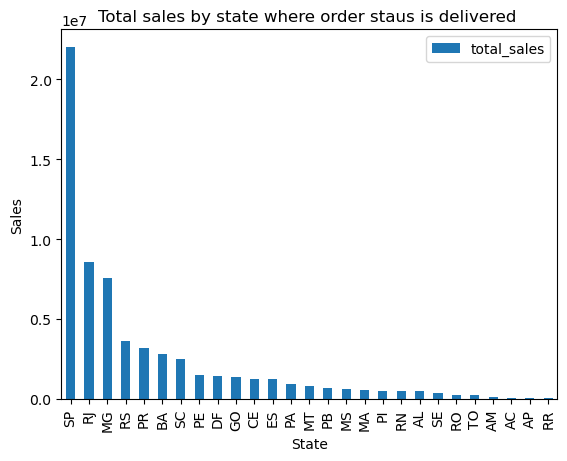

In [80]:
total_sales_by_state.plot(kind='bar',x='customer_state',y='total_sales',xlabel='State',ylabel='Sales')
plt.title("Total sales by state where order staus is delivered ")
plt.show()

## Yearly sales

In [83]:
## yearly sales
yearly_sales = customer_order_payment[['order_delivered_customer_date','total_payment']]
yearly_sales['Year'] = yearly_sales['order_delivered_customer_date'].dt.year

C:\Users\varad\AppData\Local\Temp\ipykernel_24952\1288647012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_sales['Year'] = yearly_sales['order_delivered_customer_date'].dt.year


     Year  total_payment
0  2016.0      241724.49
1  2017.0    27819070.57
2  2018.0    35172544.37


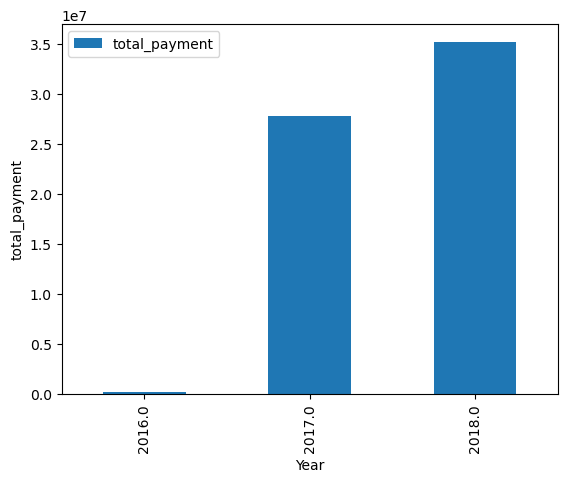

In [85]:
yearly_sales = yearly_sales.dropna()
yearly_sales=yearly_sales.groupby('Year')['total_payment'].sum().reset_index()
yearly_sales.plot(kind='bar',x='Year',xlabel='Year',y='total_payment',ylabel='total_payment')
print(yearly_sales)

## monthly sales

In [89]:
monthly_sales = customer_order_payment[['order_delivered_customer_date','total_payment']]
monthly_sales['Year_month'] = monthly_sales['order_delivered_customer_date'].dt.to_period('M')
monthly_sales

C:\Users\varad\AppData\Local\Temp\ipykernel_24952\2244461852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales['Year_month'] = monthly_sales['order_delivered_customer_date'].dt.to_period('M')


,order_delivered_customer_date,total_payment,Year_month
0,2017-05-25 10:35:35,293.74,2017-05
1,2018-01-29 12:41:19,2683.84,2018-01
2,2018-06-14 17:58:51,1104.11,2018-06
3,2018-03-28 16:04:25,173.30,2018-03
4,2018-08-09 20:55:48,2018.00,2018-08
...,...,...,...
99436,2018-04-13 20:06:37,532.68,2018-04
99437,2018-04-11 18:54:45,387.18,2018-04
99438,2018-05-09 19:03:15,280.20,2018-05
99439,2017-11-16 19:58:39,1422.14,2017-11


In [91]:
monthly_sales = monthly_sales.dropna()
year_monthly_sales=monthly_sales.groupby('Year_month')['total_payment'].sum().reset_index()
monthly_sales

,order_delivered_customer_date,total_payment,Year_month
0,2017-05-25 10:35:35,293.74,2017-05
1,2018-01-29 12:41:19,2683.84,2018-01
2,2018-06-14 17:58:51,1104.11,2018-06
3,2018-03-28 16:04:25,173.30,2018-03
4,2018-08-09 20:55:48,2018.00,2018-08
...,...,...,...
99436,2018-04-13 20:06:37,532.68,2018-04
99437,2018-04-11 18:54:45,387.18,2018-04
99438,2018-05-09 19:03:15,280.20,2018-05
99439,2017-11-16 19:58:39,1422.14,2017-11


In [93]:
year_monthly_sales

,Year_month,total_payment
0,2016-10,182152.14
1,2016-11,58083.34
2,2016-12,1489.01
3,2017-01,164064.56
4,2017-02,948244.78
5,2017-03,1630366.09
6,2017-04,1393311.15
7,2017-05,2750807.77
8,2017-06,2181679.17
9,2017-07,2317980.68


<Axes: >

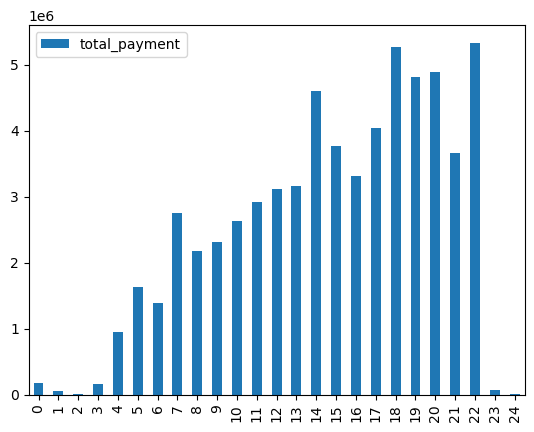

In [95]:
year_monthly_sales.plot(kind='bar')

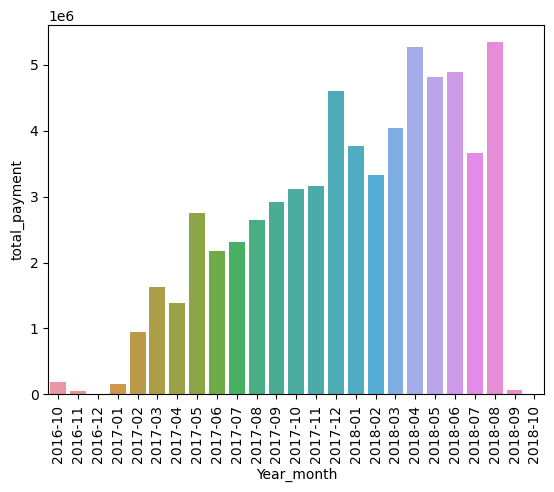

In [96]:
sns.barplot(year_monthly_sales,x='Year_month',y='total_payment')
plt.xticks(rotation=90)
plt.show()

In [100]:
customer_order_payment

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,293.74
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2683.84
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1104.11
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018.00
...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,532.68
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,387.18
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,280.20
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1422.14


In [178]:
invalid_dates = customer_order_payment[customer_order_payment['order_delivered_customer_date'] < customer_order_payment['order_approved_at']]
invalid_dates
#customer_order_payment = customer_order_payment.loc[customer_order_payment['order_delivered_customer_date'] <= customer_order_payment['order_approved_at'], ['order_approved_at', 'order_delivered_customer_date']] = customer_order_payment.loc[customer_order_payment['order_delivered_customer_date'] <= customer_order_payment['order_approved_at'], ['order_delivered_customer_date', 'order_approved_at']].values

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment
1686,caed95700dcb091eeaac59a97fe0cb17,poa,SP,82ffe097d8ddbf319a523b9bbe7725d5,delivered,2018-04-23 01:41:29,2018-04-24 18:29:30,2018-04-23 16:52:42,2018-04-24 17:34:30,2018-05-08,93.49
1779,fcb4cecebc159e210cd769d5b767d113,rio de janeiro,RJ,6fa0c125ee7d870f6602c97e33d87bc5,delivered,2018-08-09 19:32:42,2018-08-20 15:59:54,2018-08-14 15:43:00,2018-08-17 20:51:25,2018-08-23,45.71
1915,0e6c54c40385920c74542f153754aca6,cotia,SP,4e16f71b2a5ddc0266f9ddfdfd0bcfba,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,134.63
2036,3a412111e4f293539eae05b502fc63de,sao paulo,SP,e73fe43cdcd166f7f0c6e3c2bf11a917,delivered,2018-08-09 18:06:43,2018-08-20 15:57:28,2018-08-14 14:48:00,2018-08-15 15:46:38,2018-08-16,56.50
4709,1d12f3eea210892c245c9be2bd17a93c,sao bernardo do campo,SP,6d1832bd42dccbd91d1ce32da7f54492,delivered,2018-07-01 12:02:12,2018-07-05 16:19:44,2018-07-03 19:25:00,2018-07-04 22:37:38,2018-07-16,138.46
...,...,...,...,...,...,...,...,...,...,...,...
93546,2b7fff075bda701552485ef3f0810257,sao paulo,SP,cf72398d0690f841271b695bbfda82d2,delivered,2017-09-01 18:45:33,2017-09-13 22:04:39,2017-09-04 20:12:41,2017-09-11 14:15:02,2017-09-21,2275.92
94295,87bd31960d1a15744a96ea9fc9a95b8c,sao paulo,SP,fab28f3d1cfbe171566884703d82682e,delivered,2018-04-21 09:18:13,2018-04-24 18:25:30,2018-04-23 23:35:37,2018-04-24 15:28:41,2018-05-04,20.75
95760,788e845925ff64c9df5d8ba40e28cf50,ipueiras,CE,8554cb37f7158cb0b082a841d24a4589,delivered,2017-09-01 18:40:44,2017-09-13 21:58:04,2017-09-04 19:12:19,2017-09-08 20:07:45,2017-10-02,12992.80
97281,e49cb31672822de07bf6f6b0899ee58f,sao paulo,SP,1809078b655469f11b429102fb296998,delivered,2018-04-20 20:22:34,2018-04-24 19:10:37,2018-04-23 18:18:27,2018-04-24 18:47:46,2018-05-10,15.77


In [180]:
shipping_duration_df = customer_order_payment[['order_id','order_delivered_customer_date','order_approved_at']]
shipping_duration_df['shipping_duration'] = (shipping_duration_df['order_delivered_customer_date'] - shipping_duration_df['order_approved_at']).dt.days
shipping_duration_df

C:\Users\varad\AppData\Local\Temp\ipykernel_24952\1676184865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_duration_df['shipping_duration'] = (shipping_duration_df['order_delivered_customer_date'] - shipping_duration_df['order_approved_at']).dt.days


,order_id,order_delivered_customer_date,order_approved_at,shipping_duration
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017-05-16 15:22:12,8.0
1,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,2018-01-12 20:58:32,16.0
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,2018-05-20 16:19:10,25.0
3,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,2018-03-13 17:29:19,14.0
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,2018-07-29 10:10:09,11.0
...,...,...,...,...
99436,6760e20addcf0121e9d58f2f1ff14298,2018-04-13 20:06:37,2018-04-07 16:08:45,6.0
99437,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-11 18:54:45,2018-04-04 08:35:12,7.0
99438,fed4434add09a6f332ea398efd656a5c,2018-05-09 19:03:15,2018-04-08 20:30:03,30.0
99439,e31ec91cea1ecf97797787471f98a8c2,2017-11-16 19:58:39,2017-11-03 21:31:20,12.0


In [182]:
#shipping_duration_df[shipping_duration_df['shipping_duration'] < 0]

In [184]:
shipping_duration_df_correct = shipping_duration_df[shipping_duration_df['shipping_duration'] > 0]

In [186]:
shipping_duration_df_correct

,order_id,order_delivered_customer_date,order_approved_at,shipping_duration
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017-05-16 15:22:12,8.0
1,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,2018-01-12 20:58:32,16.0
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,2018-05-20 16:19:10,25.0
3,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,2018-03-13 17:29:19,14.0
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,2018-07-29 10:10:09,11.0
...,...,...,...,...
99436,6760e20addcf0121e9d58f2f1ff14298,2018-04-13 20:06:37,2018-04-07 16:08:45,6.0
99437,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-11 18:54:45,2018-04-04 08:35:12,7.0
99438,fed4434add09a6f332ea398efd656a5c,2018-05-09 19:03:15,2018-04-08 20:30:03,30.0
99439,e31ec91cea1ecf97797787471f98a8c2,2017-11-16 19:58:39,2017-11-03 21:31:20,12.0


In [188]:

#shipping_duration_df[shipping_duration_df['shipping_duration'] > 10]

In [190]:
Q1 = shipping_duration_df_correct['shipping_duration'].quantile(0.25)
Q3 = shipping_duration_df_correct['shipping_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
shipping_duration_df_correct = shipping_duration_df_correct[(shipping_duration_df_correct['shipping_duration'] >= lower_bound) & (shipping_duration_df_correct['shipping_duration'] <= upper_bound)]

# Average shipping duration

In [192]:
shipping_duration_df_correct['shipping_duration'].mean()

10.18583142013775

In [200]:
shipping_duration_df_correct

,order_id,order_delivered_customer_date,order_approved_at,shipping_duration
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017-05-16 15:22:12,8.0
1,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,2018-01-12 20:58:32,16.0
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,2018-05-20 16:19:10,25.0
3,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,2018-03-13 17:29:19,14.0
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,2018-07-29 10:10:09,11.0
...,...,...,...,...
99435,c9aea907527f5d4f5fb44955c18a79fb,2018-01-04 13:08:05,2017-12-18 00:17:27,17.0
99436,6760e20addcf0121e9d58f2f1ff14298,2018-04-13 20:06:37,2018-04-07 16:08:45,6.0
99437,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-11 18:54:45,2018-04-04 08:35:12,7.0
99439,e31ec91cea1ecf97797787471f98a8c2,2017-11-16 19:58:39,2017-11-03 21:31:20,12.0


In [195]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [197]:
df6['order_purchase_timestamp'] =pd.to_datetime(df6['order_purchase_timestamp']) 
df6['order_purchase_timestamp']

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [27]:
df7=pd.read_csv("olist_products_dataset.csv")
df7

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [81]:
df8=pd.read_csv("olist_sellers_dataset.csv")
df8

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [91]:
# which state has maximum seller
df8.groupby('seller_state')['seller_id'].count().reset_index().sort_values(by='seller_id',ascending=False)

,seller_state,seller_id
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171
19,RS,129
6,GO,40
4,DF,30
5,ES,23
2,BA,19


In [105]:
# which city has maximum seller
df8.groupby('seller_city')['seller_id'].count().reset_index().sort_values(by='seller_id',ascending=False).head(20)

,seller_city,seller_id
517,sao paulo,694
159,curitiba,127
450,rio de janeiro,96
64,belo horizonte,68
442,ribeirao preto,52
220,guarulhos,50
227,ibitinga,49
483,santo andre,45
101,campinas,41
325,maringa,40


In [69]:
df9=pd.read_csv("product_category_name_translation.csv")
df9

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [79]:
product=pd.merge(df7,df9,on='product_category_name',how='left')
product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories
